<a href="https://colab.research.google.com/github/omniaghazy/Unsupervised-learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K means**

عندك 3 اكواد عشان تستوعب الفكره

In [30]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

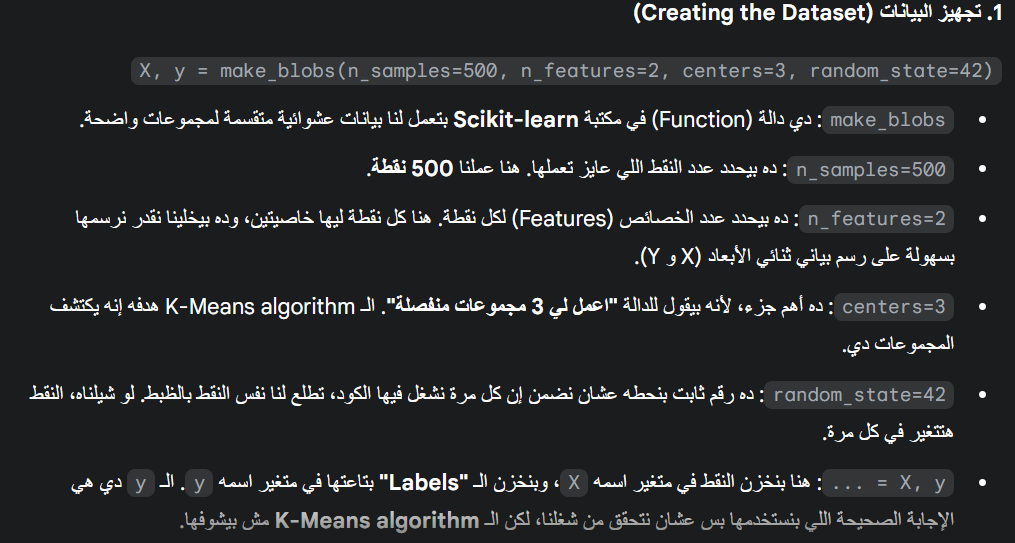

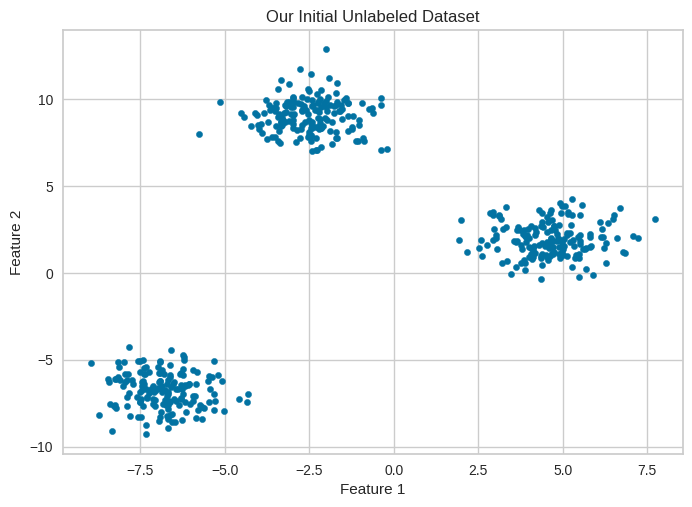

In [31]:
# Create a custom dataset with 500 samples, 2 features, and 3 centers
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=42)

# Plot the initial dataset to see what we're working with
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title('Our Initial Unlabeled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

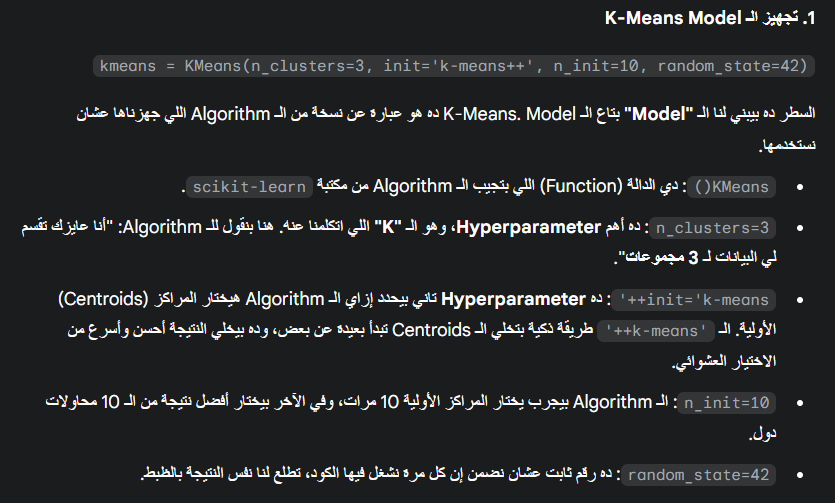

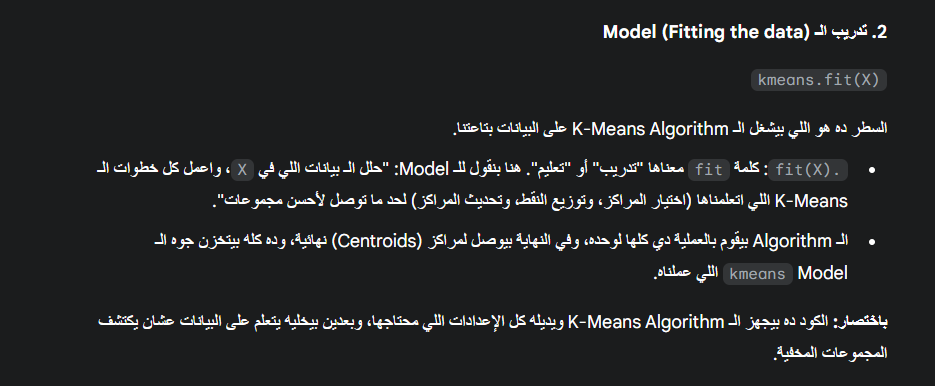

In [49]:
# Create the K-Means model with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# Fit the model to our data
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

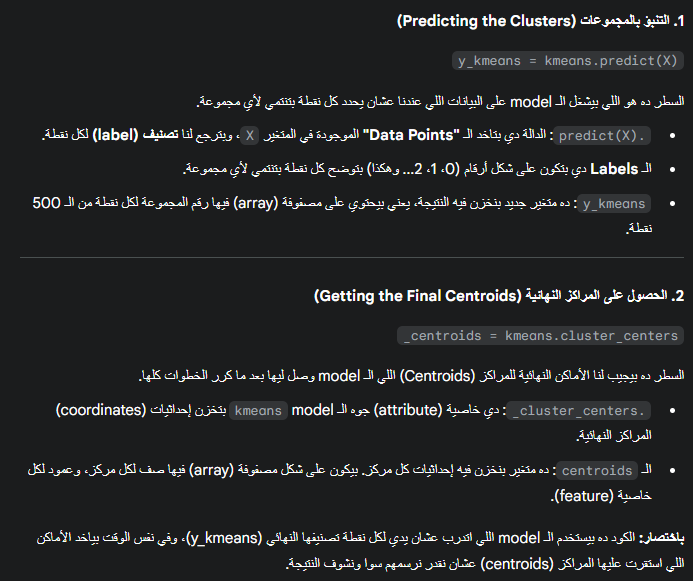

In [50]:
# Predict the cluster for each data point
y_kmeans = kmeans.predict(X)

# Get the final centroids
centroids = kmeans.cluster_centers_

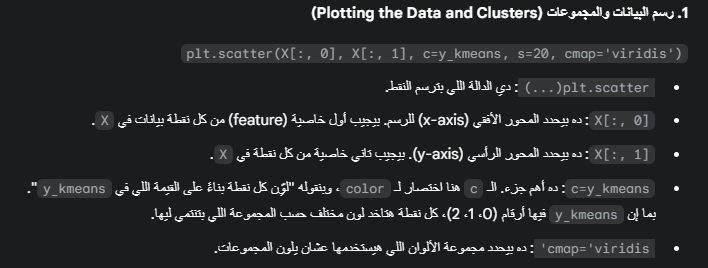

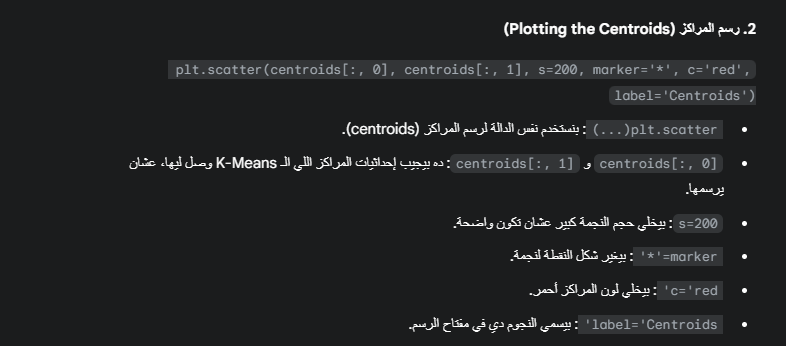

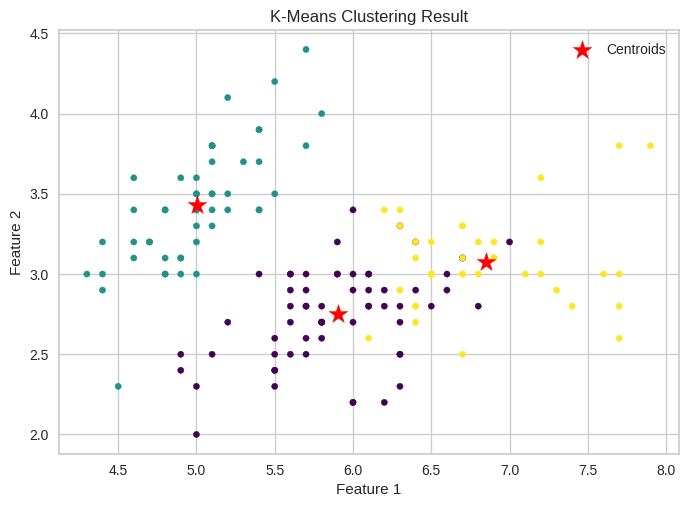

In [54]:




# Plot the final result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='*', c='red', label='Centroids')
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

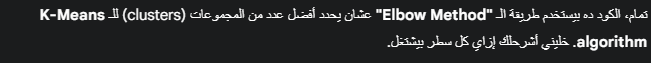

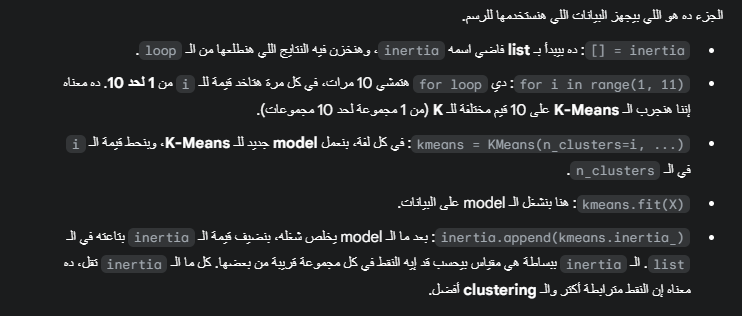

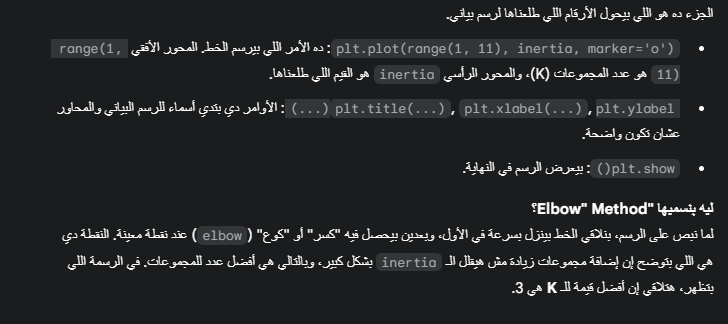

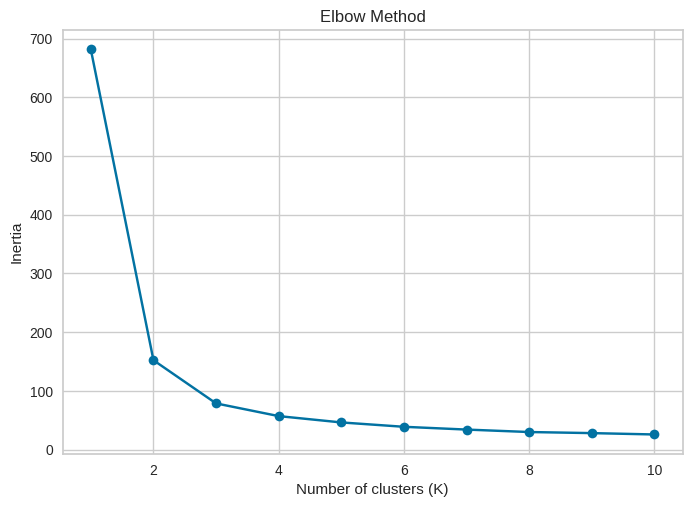

In [56]:
# Calculate inertia for different values of K
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

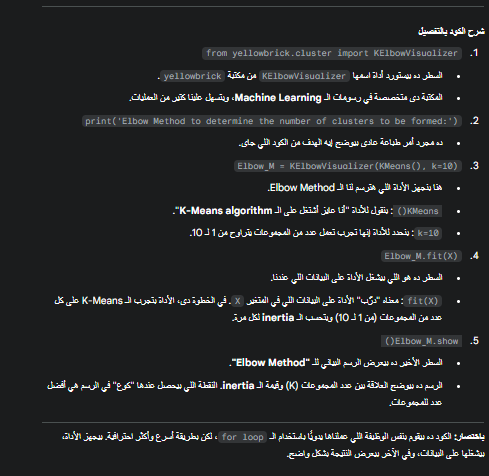

Elbow Method to determine the number of clusters to be formed:


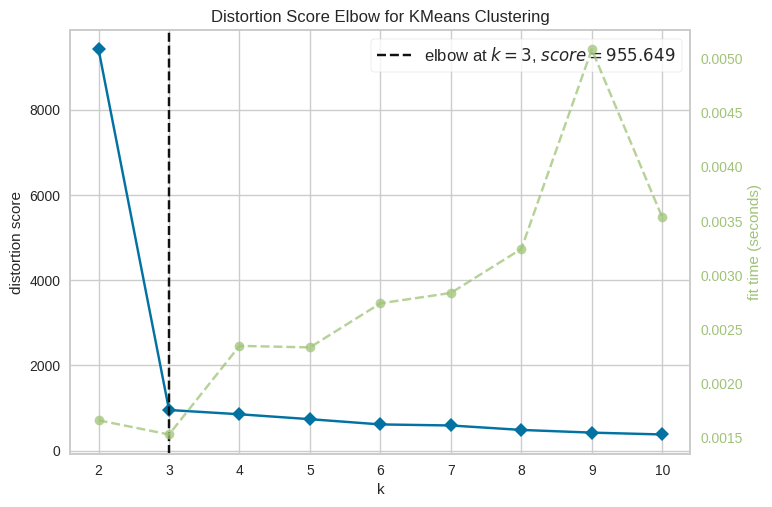

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

# **تاني كود تفهم منه اكتر **

In [35]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris Dataset
iris = load_iris()
X = iris.data

Elbow Method to determine the number of clusters to be formed:


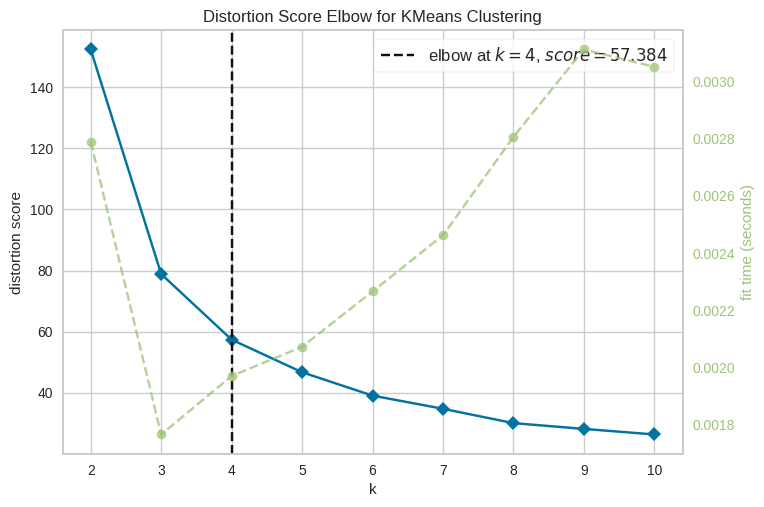

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Quick examination of elbow method to find numbers of clusters to make.
# هنا عملتها عشان تعرف انها مش دايما صح الصخ 3 زي م احنا عارفين فاستخدم ال ايلبو لنا تكون انت مش عارف فعلا عدد المجموعات لكن لو عارف حطها بايدك
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

In [37]:
# Create the K-Means model with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# Fit the model to our data and predict the clusters
y_kmeans = kmeans.fit_predict(X)

# Get the final centroids
centroids = kmeans.cluster_centers_

In [38]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

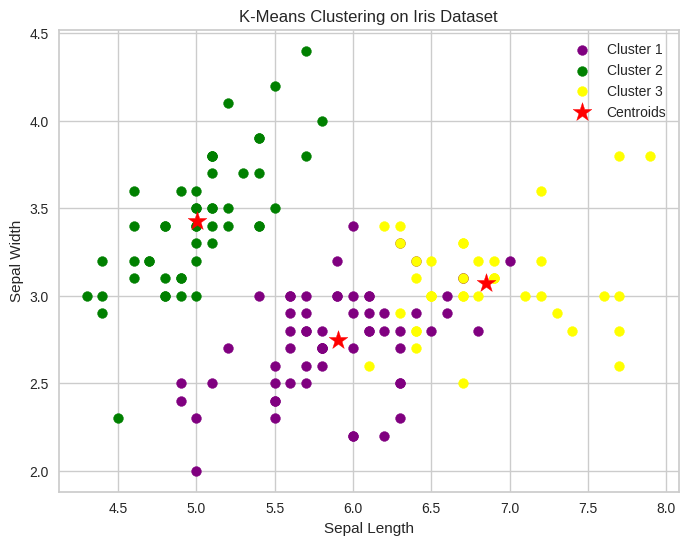

In [39]:
# Plot the final result
plt.figure(figsize=(8, 6))

# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='purple', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='yellow', label='Cluster 3')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='*', c='red', label='Centroids')

plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [40]:
import pandas as pd

In [41]:
df= pd.read_csv("/content/Mall_Customers.csv")

In [42]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
df = df.drop(columns=["CustomerID" ,"Gender"])

In [44]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [45]:
x= df.values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

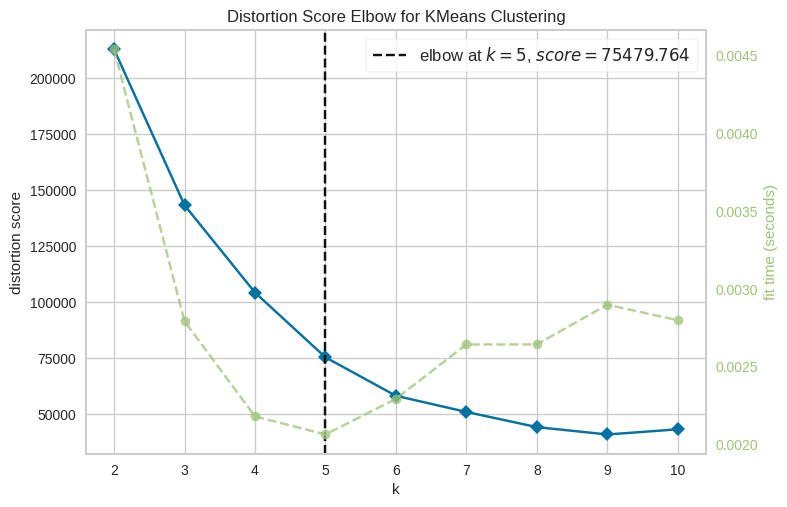

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(x)
Elbow_M.show()

In [47]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

# Fit the model to our data and predict the clusters
y_kmeans = kmeans.fit_predict(x)

# centroids
centroids = kmeans.cluster_centers_

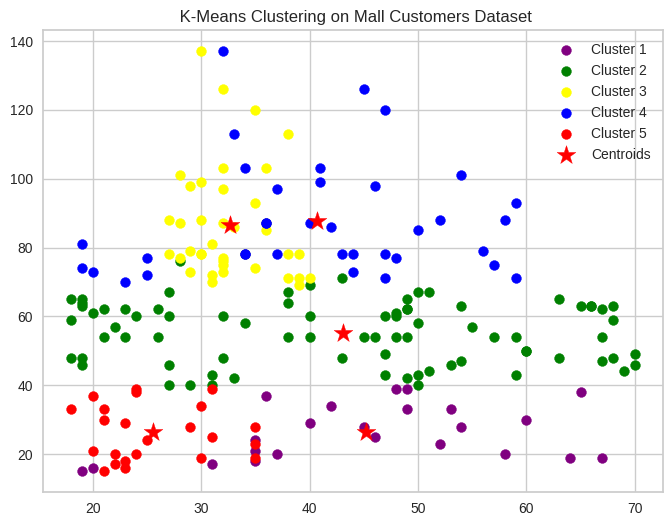

In [48]:
plt.figure(figsize=(8, 6))

plt.scatter(x[y_kmeans == 0 ,0] ,x[y_kmeans==0,1] ,s=50, c='purple', label='Cluster 1')
plt.scatter(x[y_kmeans==1,0] ,x[y_kmeans==1 ,1],s=50, c='green', label='Cluster 2')
plt.scatter(x[y_kmeans==2,0] ,x[y_kmeans==2 ,1],s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y_kmeans==3,0] ,x[y_kmeans==3 ,1],s=50, c='blue', label='Cluster 4')
plt.scatter(x[y_kmeans==4,0] ,x[y_kmeans==4 ,1],s=50, c='red', label='Cluster 5')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='*', c='red', label='Centroids')

plt.title(" K-Means Clustering on Mall Customers Dataset")

plt.legend()